# Test simple DBSCAN

In [3]:
import numpy as np
import pandas as pd
import re

In [4]:
variant = "2023"
dataset_dir = "/lcrc/group/ATLAS/users/jhoya/DAQ/atlas-hlt-datasets/"
train_set_x_df = pd.read_csv(f'{dataset_dir}/train_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)
test_set_x_df = pd.read_csv(f'{dataset_dir}/test_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)
val_set_x_df = pd.read_csv(f'{dataset_dir}/val_set_'\
                                    f'dcm_rates_{variant}.csv', index_col=0)

In [5]:
train_set_x_df

,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55002.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55003.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55004.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55005.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55006.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55007.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55008.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55009.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55010.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55011.info,...,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91031.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91032.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91033.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91034.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91035.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91036.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91037.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91038.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91039.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91040.info
2023-06-06 03:35:55.000935+02:00,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-06 03:36:00.000966+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-06 03:36:05.000923+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-06 03:36:10.000913+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-06 03:36:15.000916+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 11:10:40.000857+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-12 11:10:45.000892+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-12 11:10:50.000917+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-12 11:10:55.000891+02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#test_set_x_df
#val_set_x_df
print(f'Train set size: {len(train_set_x_df)}')
print(f'Test set size: {len(test_set_x_df)}')
print(f'Val set size: {len(val_set_x_df)}')

Train set size: 56890
Test set size: 24018
Val set size: 15784


In [7]:
column_names_train = list((train_set_x_df).columns.values)
column_names_test = list((test_set_x_df).columns.values)
column_names_val = list((val_set_x_df).columns.values)

print(f'Channels train: {len(column_names_train)}')
print(f'Channels test: {len(column_names_test)}')
print(f'Channels val: {len(column_names_val)}')


Channels train: 2620
Channels test: 2618
Channels val: 2611


In [8]:
train_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)
    
test_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)

val_set_x_df.dropna(axis=0,
                        thresh=50,
                        inplace=True)

nan_amount_train_unlabeled = np.mean(np.sum(pd.isna(train_set_x_df.to_numpy()), 1)/train_set_x_df.shape[1])
nan_amount_test = np.mean(np.sum(pd.isna(test_set_x_df.to_numpy()), 1)/test_set_x_df.shape[1])
nan_amount_val = np.mean(np.sum(pd.isna(val_set_x_df.to_numpy()), 1)/val_set_x_df.shape[1])

print('Mean sparsity preprocessed:')
print(f'\tTrain set: {100*nan_amount_train_unlabeled:.3f} %')
print(f'\tTest set: {100*nan_amount_test:.3f} %')
print(f'\tVal set: {100*nan_amount_val:.3f} %')

Mean sparsity preprocessed:
	Train set: 0.386 %
	Test set: 0.296 %
	Val set: 0.243 %


In [9]:
def get_tpu_number(channel_name):
    parameters = [int(substring) for substring in re.findall(r'\d+', channel_name)]
    # print(f'{channel_name}: {parameters}')
    return parameters[-1]

In [10]:
tpu_numbers_train = [get_tpu_number(label) for label in column_names_train]
tpu_numbers_test = [get_tpu_number(label) for label in column_names_test]
tpu_numbers_val = [get_tpu_number(label) for label in column_names_val]

tpu_numbers_train_unique = np.array(list(set(tpu_numbers_train)))
tpu_numbers_test_unique = np.array(list(set(tpu_numbers_test)))
tpu_numbers_val_unique = np.array(list(set(tpu_numbers_val)))

rack_numbers_train = np.floor_divide(tpu_numbers_train, 1000)
rack_numbers_test = np.floor_divide(tpu_numbers_test, 1000)
rack_numbers_val = np.floor_divide(tpu_numbers_val, 1000)

In [11]:
racks_train, counts_train =\
    np.unique(rack_numbers_train, return_counts=True)

print('Train set TPUs per rack:')

for rack, count in zip(racks_train, counts_train):
    print(f'{rack}: {count}')

Train set TPUs per rack:
1: 31
2: 31
3: 30
4: 31
5: 31
6: 31
7: 30
8: 31
9: 30
10: 31
11: 31
12: 31
13: 31
17: 31
18: 31
19: 31
20: 31
21: 31
22: 31
23: 31
24: 31
25: 31
26: 31
44: 39
45: 38
46: 39
47: 39
48: 39
49: 39
50: 39
51: 39
52: 39
53: 39
54: 39
55: 39
56: 38
57: 39
58: 36
59: 39
60: 38
61: 37
62: 39
64: 39
65: 38
66: 39
67: 39
68: 37
69: 39
70: 38
71: 39
72: 38
73: 39
74: 37
75: 39
76: 39
77: 39
79: 39
80: 39
81: 38
82: 39
83: 15
84: 39
85: 39
86: 39
87: 39
88: 39
89: 39
90: 39
91: 39
92: 39
93: 39
94: 39
95: 39


In [12]:
test_time_step = val_set_x_df[(val_set_x_df != 0).all(axis=1)].iloc[10].fillna(0)
print(test_time_step.values.reshape(-1, 1).size)
val_set_x_df[(val_set_x_df != 0).all(axis=1)].iloc[9:11]

2611


,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55002.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55003.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55004.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55005.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55006.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55007.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55008.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55010.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55011.info,DF_IS:HLT-24:tpu-rack-55.DCM:HLT-24:tpu-rack-55:pc-tdq-tpu-55012.info,...,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91031.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91032.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91033.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91034.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91035.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91036.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91037.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91038.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91039.info,DF_IS:HLT-32_48:tpu-rack-91.DCM:HLT-32_48:tpu-rack-91:pc-tdq-tpu-91040.info
2023-06-11 12:39:00.001629+02:00,9.600109,9.600071,9.600043,9.600181,9.600115,9.400045,9.600217,9.600144,9.599949,9.600128,...,19.198085,19.199656,19.000082,18.800050,18.800050,19.000016,18.599922,18.800030,19.000206,19.199432
2023-06-11 12:39:05.001700+02:00,9.599876,9.599995,9.599988,9.599847,9.599880,9.599926,9.599821,9.599948,9.399904,9.599957,...,19.201898,19.200332,19.199813,18.599969,19.200118,19.199891,19.000157,18.400179,19.199763,19.200743


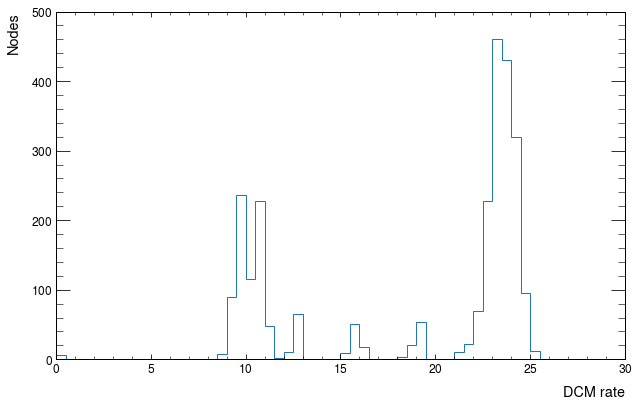

In [13]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ATLAS)

plt.figure(figsize=(10, 6))
bins = [i*.5 for i in range(60)]
plt.hist(test_time_step.values.reshape(-1,1), bins=bins, histtype='step')  
plt.xlabel("DCM rate")
plt.ylabel("Nodes")
plt.savefig("rates.pdf", format="pdf", bbox_inches="tight", pad_inches=0.05)
plt.savefig("rates.png", format="png", dpi=300, bbox_inches="tight", pad_inches=0.05)


In [14]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [15]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
flat_data = test_time_step.values.reshape(-1, 1)
clusters = dbscan.fit_predict(flat_data)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_clusters

6

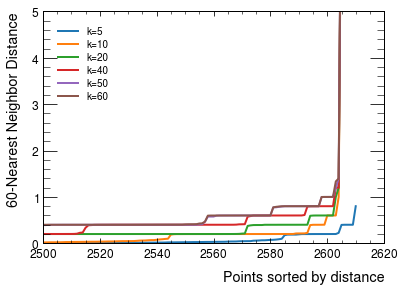

In [16]:
fig, ax = plt.subplots()
for k in [5, 10, 20, 40, 50, 60]:
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(flat_data)
    distances, indices = nbrs.kneighbors(flat_data)
    # Sort distances to get the k-distance graph
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances, label=f'k={k}')
ax.set_xlim(2500, 2620)
ax.set_ylim(0, 5)
ax.legend()

plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-Nearest Neighbor Distance")
plt.savefig("k-nearest.pdf", format="pdf", bbox_inches="tight", pad_inches=0.05)
plt.savefig("k-nearest.png", format="png", dpi=300, bbox_inches="tight", pad_inches=0.05)


In [17]:
# Now let's try the Dirichlet process

In [18]:
from sklearn.mixture import BayesianGaussianMixture

In [19]:
bgm = BayesianGaussianMixture(n_components=20, random_state=42).fit(flat_data)
print(bgm.weights_)
print(bgm.means_.T[0])

[6.30389152e-01 4.23236350e-02 4.76165649e-04 3.09167362e-02
 2.66534933e-01 4.70332271e-04 3.54602378e-03 4.48867217e-04
 4.40117458e-04 4.31596712e-04 4.23294319e-04 2.35818891e-02
 1.64348117e-05 7.82610081e-07 3.72671467e-08 1.77462603e-09
 8.45060016e-11 4.02409532e-12 1.91623586e-13 9.12493269e-15]
[23.51433049 12.43157875 18.82458045 19.11303201 10.16211776 18.82183346
  5.66085206 18.84108181 18.84632208 18.8513996  18.85632236 15.83891774
 19.07218866 19.07218866 19.07218866 19.07218866 19.07218866 19.07218866
 19.07218866 19.07218866]


2611 2611


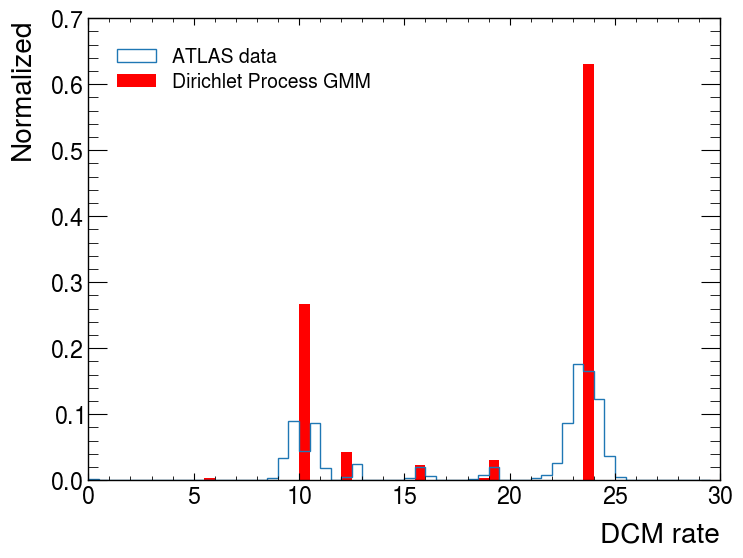

In [20]:
bins = [i*.5 for i in range(60)]
data = test_time_step.values.reshape(-1,1)
counts, bins = np.histogram(data, bins=bins)
print(data.shape[0], sum(counts))
scaled_counts = counts/data.shape[0]

plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots()

plt.hist(data, bins=bins, histtype='step', weights=np.ones(data.shape[0])/data.shape[0], label="ATLAS data") 
plt.hist(bgm.means_, bins=bins, weights=bgm.weights_, color="red", alpha=1, label='Dirichlet Process GMM')
plt.xlabel("DCM rate")
plt.ylabel("Normalized")
ax.legend(loc='upper left')
plt.savefig("rates_with_DPGMM.pdf", format="pdf", bbox_inches="tight", pad_inches=0.05)
plt.savefig("rates_with_DPGMM.png", format="png", dpi=300, bbox_inches="tight", pad_inches=0.05)


In [21]:
# Now for HDBSCAN

In [23]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_samples=5)
labels = hdb.fit_predict(data)


In [29]:
len(set(labels))

96

In [28]:
n_clusters = len(np.unique(labels[labels >= 0]))

print(f"Number of clusters: {n_clusters}")

Number of clusters: 95
